# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset from the repository
media = pd.read_csv("/media/atul/Volume:D/UDEMY/KaggleMAchineLearning/11. HotstarNetflix Real world Case Study for Multiple Linear Regression/code_for_udemy/mediacompany.csv")
media = media.drop('Unnamed: 7',axis=1)

In [3]:
#display of top 5 elements
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
#converting date to required type
media['Date'] = pd.to_datetime(media['Date'])

In [5]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [7]:
#Deriving a variable Days to get the number of days show is running

from datetime import date

d0 = date(2017,2,28)
d1 = media.Date
delta = d1-d0
media['day']=delta

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [9]:
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])

In [10]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [11]:
media['day'] = media['day'].astype(int)

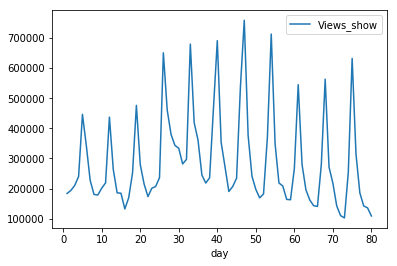

In [13]:
#days vs views_show
media.plot.line(x='day',y='Views_show')
#provides insight for the relationship b/w days and views data

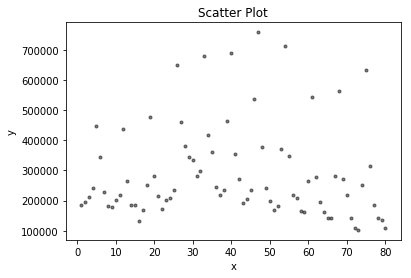

In [16]:
#scatter plot (days vs Views show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day,media.Views_show,s=area,c=colors,alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

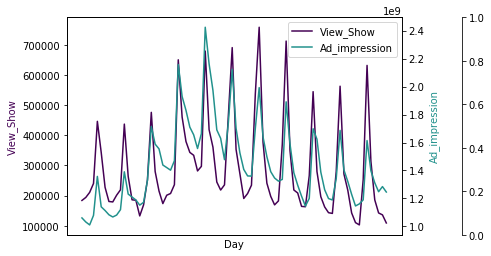

In [18]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, and  bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [20]:
#derived columns for weekends as we are getting spkies near weekends
#1 = sunday, 7 for saturday
media['weekday']= (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


# Running first model(ml1) on Weekday & visitors

In [21]:
X = media[['Visitors','weekday']]
Y = media['Views_show']

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
ln = LinearRegression()

In [24]:
ln.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
import statsmodels.api as sm
#it does not fit itself but has to be done manually
X = sm.add_constant(X)

lm_1 = sm.OLS(Y,X).fit()
print(lm_1.summary())

/usr/lib/python3/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           8.01e-12
Time:                        19:43:30   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [26]:
#create weekend variable with 1 at weekends and 0 on weekdays
def cond(i):
    if i%7 == 5: return 1
    elif i%7 == 4: return 1
    else: return 0
    return i
    
    
media['weekend'] = [cond(i) for i in media['day']]    

In [27]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [28]:
#Putting data again to build model
X = media[['Visitors','weekend']]

Y = media['Views_show']

In [29]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_2 = sm.OLS(Y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           2.51e-12
Time:                        20:32:05   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [30]:
#Model number 3 
X = media[['Visitors','weekend','Character_A']]

Y = media['Views_show']

In [32]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_3 = sm.OLS(Y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        20:36:48   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [33]:
#creating a new column Lag_views i.e previous day views 
media['Lag_views'] = np.roll(media['Views_show'],1)
media.Lag_views.replace(108961,0,inplace=True)

In [35]:
media.head(20)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2,0,446314
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,3,0,342997
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,4,0,227313
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,5,0,180313
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,6,0,178800


# 4th model for prediction 


In [36]:
X = media[['Visitors','Character_A','Lag_views','weekend']]

Y = media['Views_show']

In [37]:
#OLS stands for ordinary linear squares regression model
import statsmodels.api as sm

X = sm.add_constant(X)

lm_4 = sm.OLS(Y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           3.16e-21
Time:                        20:45:23   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

In [ ]:
X = media[['Character_A','weekend','Views_platform']]

Y = media['Views_show']

In [40]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_5 = sm.OLS(Y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           3.59e-15
Time:                        20:52:10   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [43]:
#6th model 
X = media[['Character_A','weekend','Visitors','Ad_impression']]

Y = media['Views_show']

In [44]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_6 = sm.OLS(Y,X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.10e-25
Time:                        20:56:14   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [45]:
X = media[['Character_A','weekend','Ad_impression']]

Y = media['Views_show']

In [47]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_7 = sm.OLS(Y,X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        20:59:23   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [48]:
media['ad_impression_million'] = media['Ad_impression']/1000000

In [50]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_views,ad_impression_million
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0,1060.860448
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738,1031.846645
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763,1010.867575
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479,1079.194579
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061,1357.736987


In [55]:
X = media[['Character_A','weekend','ad_impression_million']]

Y = media['Views_show']

In [56]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_8 = sm.OLS(Y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        21:03:28   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

# Making Prediction Model


In [64]:
X = media[['weekend','Character_A','ad_impression_million']]

Y = media['Views_show']
import statsmodels.api as sm
X = sm.add_constant(X)
lm_9 = sm.OLS(Y,X).fit()

Predicted_views = lm_9.predict(X)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show,Predicted_views)
r_squared = r2_score(media.Views_show,Predicted_views)

In [66]:
print('Mean Squared errors: ',mse)
print('r squared: ',r_squared)

Mean Squared errors:  4677651616.25
r squared:  0.802643446858


Text(0,0.5,'Views')

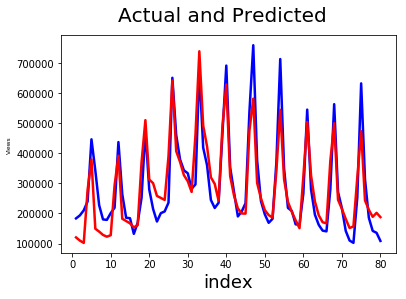

In [70]:
#actual vs predicted 
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show,color='blue',linewidth=2.5, linestyle='-')
plt.plot(c,Predicted_views, color='red', linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('index',fontsize=18)
plt.ylabel('Views',fontsize=6)

Text(0,0.5,'Views_show_Predicted Views')

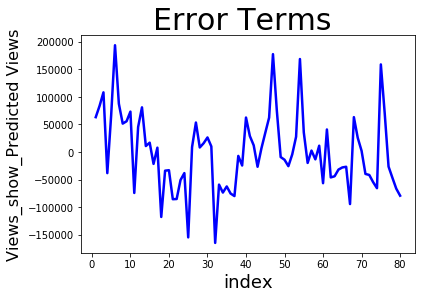

In [71]:
#error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color='blue',linewidth=2.5,linestyle='-')
fig.suptitle('Error Terms', fontsize=30)
plt.xlabel('index',fontsize=18)
plt.ylabel('Views_show_Predicted Views',fontsize=16)

In [ ]:
#we get that error distribution is fairly well on both sides of mean =0 
#Hence we got quite a good model for prediction
#Controlling ad budget, character_A and weekend special considerations
#the overall viewership of the show can be increased